# 樣型識別 CH02 改進版

資工四 B0729003 何妍霖

*此檔案為改進提升準確率的結果，自我學習的部分在Pattern_Recognition_CH02_Study.ipynb中

在六種已知增加準確率的方法中，我選擇了在其他條件不變的情況下，**透過增加epoches和batch_size的方式**，來增加準確率。


前後比較
- epoches: 10 -> 15
- batch_size: 100 -> 125

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
(xr,yr), (xt,yt)= keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
xr.shape, yr.shape, xt.shape, yt.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
x= xr[18]
#%%
for i in range(28):
    for j in range(28):
        z= x[i,j]
        print(f'{z:3d}', end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 34169250 40  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 58242221143 17  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 75247143 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 37245184  2  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  8192200 14  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0139247 28  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  7231183  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0125243 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0195184  0  0  0  0  0  0  0  0  

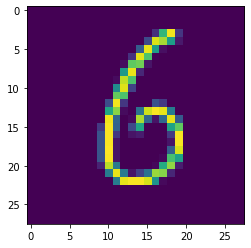

In [5]:
import matplotlib.pyplot as pl
pl.imshow(x)

In [6]:
xr1= xr.reshape(-1, 28*28) 
xt1= xt.reshape(-1, 28*28) 

In [7]:
aModel= keras.Sequential([
    keras.Input(28*28),
    keras.layers.Dense(100),    
    keras.layers.Dense(10)   
    ])

aModel.compile(
    loss=     'sparse_categorical_crossentropy',
    metrics= ['accuracy']
    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


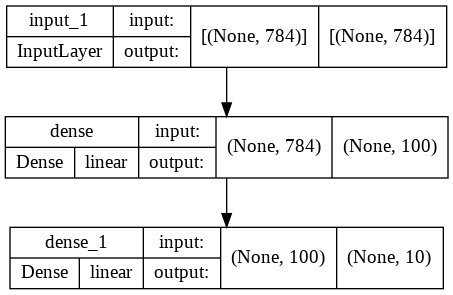

In [8]:
aModel.summary()

keras.utils.plot_model(aModel, 
    show_shapes= True, 
    show_layer_activations= True)

In [9]:
aModel.fit(xr1, yr, 
           epochs= 15, 
           batch_size= 120)

aModel.evaluate(xt1, yt)

Epoch 1/15
500/500 [==============================] - 3s 5ms/step - loss: 2.5010 - accuracy: 0.2132
Epoch 2/15
500/500 [==============================] - 2s 5ms/step - loss: 2.2887 - accuracy: 0.1961
Epoch 3/15
500/500 [==============================] - 2s 5ms/step - loss: 2.2733 - accuracy: 0.1844
Epoch 4/15
500/500 [==============================] - 2s 5ms/step - loss: 2.1924 - accuracy: 0.2310
Epoch 5/15
500/500 [==============================] - 2s 5ms/step - loss: 2.3774 - accuracy: 0.2166
Epoch 6/15
500/500 [==============================] - 2s 5ms/step - loss: 2.2516 - accuracy: 0.2105
Epoch 7/15
500/500 [==============================] - 2s 5ms/step - loss: 2.1815 - accuracy: 0.2113
Epoch 8/15
500/500 [==============================] - 2s 5ms/step - loss: 2.2101 - accuracy: 0.2177
Epoch 9/15
500/500 [==============================] - 2s 5ms/step - loss: 2.1644 - accuracy: 0.2755
Epoch 10/15
500/500 [==============================] - 2s 5ms/step - loss: 2.1884 - accuracy: 0.2587

[2.2572286128997803, 0.29350000619888306]

在練習檔(Pattern_Recognition_CH02_Study.ipynb)中，在epoches = 10、batch_size = 100的情況下，跑出來的結果為[2.1417391300201416, 0.20520000159740448]。
在調整epoches和batch_size後，結果有明顯的提升，變為[2.2572286128997803, 0.29350000619888306]。

然而增加epoches和batch_size，會導致訓練時長變更長，且可能發生過擬合的狀況，因此也不能提升太多。